In [1]:
import os
import h5py
import hdf5plugin
import numpy as np
import tifffile

In [2]:
def explore_hdf5_structure(file_path):
    """
    Prints the structure of an HDF5 file to help locate data paths.
    
    Parameters:
    file_path (str): The path to the HDF5 file.
    """
    with h5py.File(file_path, 'r') as hdf_file:
        print(f"Structure of HDF5 file: {file_path}")
        hdf_file.visit(print)

# Example usage:
# file_path = "/nsls2/data/staff/xyang4/data_cs/ca3ir4sn13/setup_6oct23/setup_6oct23_020_008_master.h5"
# explore_hdf5_structure(file_path)
    

Structure of HDF5 file: /nsls2/data/staff/xyang4/data_cs/ca3ir4sn13/setup_6oct23/setup_6oct23_020_008_master.h5
entry
entry/data
entry/instrument
entry/instrument/beam
entry/instrument/beam/incident_wavelength
entry/instrument/detector
entry/instrument/detector/beam_center_x
entry/instrument/detector/beam_center_y
entry/instrument/detector/bit_depth_image
entry/instrument/detector/bit_depth_readout
entry/instrument/detector/count_time
entry/instrument/detector/countrate_correction_applied
entry/instrument/detector/description
entry/instrument/detector/detectorSpecific
entry/instrument/detector/detectorSpecific/auto_summation
entry/instrument/detector/detectorSpecific/calibration_type
entry/instrument/detector/detectorSpecific/compression
entry/instrument/detector/detectorSpecific/countrate_correction_bunch_mode
entry/instrument/detector/detectorSpecific/countrate_correction_count_cutoff
entry/instrument/detector/detectorSpecific/data_collection_date
entry/instrument/detector/detectorSp

In [2]:
def read_hdf5_tiff_data(directory):
    """
    Reads TIFF-like data stored at '/entry/data/data' from all HDF5 files in the specified directory,
    but only processes files that contain 'data' in the filename.
    
    Parameters:
    directory (str): The path to the directory containing HDF5 files.
    
    Returns:
    A dictionary containing the TIFF data from each file, with filenames as keys.
    """
    tiff_data_dict = {}

    # Iterate over all files in the directory
    for filename in os.listdir(directory):
        # Process only files that contain 'data' in their filename
        if "data" in filename and filename.endswith(".h5"):
            file_path = os.path.join(directory, filename)
            try:
                # Open the HDF5 file
                with h5py.File(file_path, 'r') as hdf_file:
                    # Access the data at the specified path
                    if '/entry/data' in hdf_file:
                        tiff_data = np.squeeze(np.array(hdf_file['/entry/data/data']))
                        tiff_data_dict[filename] = tiff_data
                        print(f"Successfully read TIFF data from: {filename}")
                    else:
                        print(f"/entry/data not found in {filename}")
            except Exception as e:
                print(f"Failed to read {filename}: {e}")

    return tiff_data_dict

In [3]:
def save_tiff_data(tiff_data, output_dir, original_filename):
    """
    Save the TIFF data as an image file in a specified directory using tifffile.
    
    Parameters:
    tiff_data (numpy array): The TIFF data array.
    output_dir (str): The directory to save the TIFF file.
    original_filename (str): The original HDF5 filename, used for naming the output TIFF file.
    """
    # Remove the extension from the original filename and append .tiff
    output_filename = os.path.splitext(original_filename)[0] + ".tiff"
    output_path = os.path.join(output_dir, output_filename)
    
    # Check if the data type is string/unicode or numeric
    if tiff_data.dtype.kind in {'U', 'S'}:
        print(f"Data is not numerical: {tiff_data.dtype}. Skipping conversion for {original_filename}.")
    else:
        # Save the TIFF using tifffile
        tifffile.imwrite(output_path, tiff_data.astype('uint8'))  # Convert to uint8 or other valid format
        print(f"Saved TIFF to {output_path}")

In [4]:
# Example usage/nsls2/data/staff/xyang4/data_cs/ca3ir4sn13/setup_6oct23/
input_directory = "/nsls2/data/staff/xyang4/data_cs/ca3ir4sn13/setup_6oct23/"
output_directory = "/nsls2/data/staff/xyang4/data_cs/ca3ir4sn13/setup_6oct23_tiff_0910_tmp/"

# Make sure the output directory exists
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Read the HDF5 files and extract TIFF data
tiff_data_dict = read_hdf5_tiff_data(input_directory)

# Save each TIFF data array to the output directory with the same name
for file_name, data in tiff_data_dict.items():
    save_tiff_data(data, output_directory, file_name)

Successfully read TIFF data from: setup_6oct23_018_019_data_000001.h5
Successfully read TIFF data from: setup_6oct23_017_047_data_000001.h5
Successfully read TIFF data from: setup_6oct23_020_015_data_000001.h5
Successfully read TIFF data from: setup_6oct23_020_000_data_000001.h5
Successfully read TIFF data from: setup_6oct23_023_001_data_000001.h5
Successfully read TIFF data from: setup_6oct23_026_017_data_000001.h5
Successfully read TIFF data from: setup_6oct23_026_002_data_000001.h5
Successfully read TIFF data from: setup_6oct23_025_003_data_000001.h5
Successfully read TIFF data from: setup_6oct23_016_018_data_000001.h5
Successfully read TIFF data from: setup_6oct23_008_004_data_000001.h5
Successfully read TIFF data from: setup_6oct23_008_011_data_000001.h5
Successfully read TIFF data from: setup_6oct23_017_023_data_000001.h5
Successfully read TIFF data from: setup_6oct23_017_036_data_000001.h5
Successfully read TIFF data from: setup_6oct23_003_006_data_000001.h5
Successfully read TI

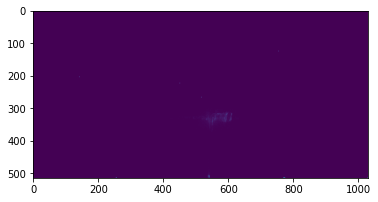

In [9]:
import matplotlib.pyplot as plt
data = tifffile.imread('/nsls2/data/staff/xyang4/data_cs/ca3ir4sn13/setup_6oct23_tiff_0910/setup_6oct23_002_001_data_000001.tiff')
plt.imshow(data)
plt.show()